In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv(r'D:\exoplanets\data\k2_raw_data_output.csv')

In [6]:
data.isna().sum()

is_planet                             8
disposition_score                  1806
prediction_probability             1806
predicted_is_planet                1806
right_ascens                          4
declination                           4
planet_radius                       365
planet_temp                        1435
planet_insolation                  1619
period                               26
orbit_semi_major_axis              1425
orbit_inclination                  1432
trans_depth                         768
trans_duration                      478
impact                             1139
num_transits                       1806
stellar_radius                       61
stellar_temp                        594
stellar_logg                        763
stellar_mass                        824
stellar_metallicity                1009
planet_star_radius_ratio            429
fitted_stellar_density             1414
orbit_distance_over_star_radius     644
planet_count                          2


In [7]:
data.drop(columns = ['disposition_score', 'predicted_is_planet', 'prediction_probability', 'num_transits'], inplace = True)

In [8]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [9]:
df_filled = pd.DataFrame(imp.fit_transform(data.drop(columns = ['is_planet'])), columns=data.drop(columns = ['is_planet']).columns)

c:\Users\nekit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [12]:
df_filled['is_planet'] = data['is_planet']
df_filled = df_filled[data.columns]

In [14]:
df_filled.isna().sum()

is_planet                          8
right_ascens                       0
declination                        0
planet_radius                      0
planet_temp                        0
planet_insolation                  0
period                             0
orbit_semi_major_axis              0
orbit_inclination                  0
trans_depth                        0
trans_duration                     0
impact                             0
stellar_radius                     0
stellar_temp                       0
stellar_logg                       0
stellar_mass                       0
stellar_metallicity                0
planet_star_radius_ratio           0
fitted_stellar_density             0
orbit_distance_over_star_radius    0
planet_count                       0
dtype: int64

In [15]:
df_filled.dropna(inplace = True)

C:\Users\nekit\AppData\Local\Temp\ipykernel_25168\2806612039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled.dropna(inplace = True)


In [16]:
df_filled

,is_planet,right_ascens,declination,planet_radius,planet_temp,planet_insolation,period,orbit_semi_major_axis,orbit_inclination,trans_depth,...,impact,stellar_radius,stellar_temp,stellar_logg,stellar_mass,stellar_metallicity,planet_star_radius_ratio,fitted_stellar_density,orbit_distance_over_star_radius,planet_count
0,2.0,53.651123,20.599021,2.578070,889.004040,250.046065,41.685500,0.112643,89.550000,0.049000,...,0.319809,1.080000,5766.000000,4.500000,1.670000,-0.150000,0.019352,1.890000,55.800000,1.000000
1,1.0,183.846245,-6.268329,1.120000,1054.000000,907.971812,2.301830,0.119389,86.481507,2.268000,...,0.420000,0.762602,4616.520000,4.536790,0.730000,-0.030000,0.014400,2.320574,11.800000,0.000000
2,1.0,175.938595,-5.873359,4.190000,558.195312,810.913078,1.194749,0.025679,91.713108,0.448000,...,0.000000,0.570000,3919.000000,4.778933,0.598102,0.116314,0.060050,8.985646,17.277765,0.000000
3,1.0,181.371809,-5.848274,8.840000,772.000000,767.475352,6.178870,0.069934,89.831954,1.303000,...,0.170000,0.849432,4719.280000,4.458330,0.756000,0.213000,0.105800,1.739007,18.100000,0.000000
4,1.0,173.902664,-5.364612,0.860000,833.205855,682.423888,1.175890,0.079141,87.491993,0.068600,...,0.406242,0.309000,5125.607783,4.572104,0.832768,-0.012238,0.025400,-9.420650,6.300000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2.0,331.203092,-12.019067,1.830000,997.807015,56.343441,0.789610,0.123385,86.730000,0.753688,...,0.450266,1.156000,5380.343209,4.426487,1.058000,-0.193421,0.005729,10.394284,10.470247,4.000000
1802,2.0,203.758195,-17.503496,14.907970,940.707738,45.862101,4.465630,0.179458,89.600000,1.600000,...,0.358371,1.090000,5900.000000,4.300000,1.110000,-0.200000,0.079390,1.200000,10.830000,1.000000
1803,2.0,342.385899,-10.675469,14.235000,1710.000000,1475.751518,2.484193,0.037500,82.000000,1.070000,...,0.882000,1.260000,6100.000000,4.290000,1.140000,0.070000,0.131781,0.790000,3.522321,1.000000
1804,2.0,174.588025,1.775092,11.861487,837.869382,167.265438,69.553171,0.200042,87.804632,1.992564,...,0.475862,1.379154,5176.051518,4.362761,0.905134,-0.052299,0.085888,4.448126,103.440945,0.631929


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\nekit\AppData\Local\Temp\ipykernel_25168\3657776570.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10, 6))


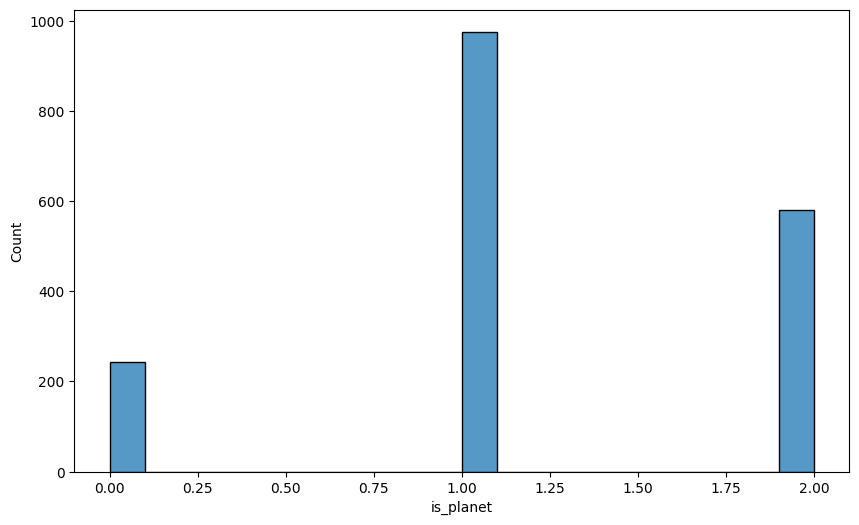

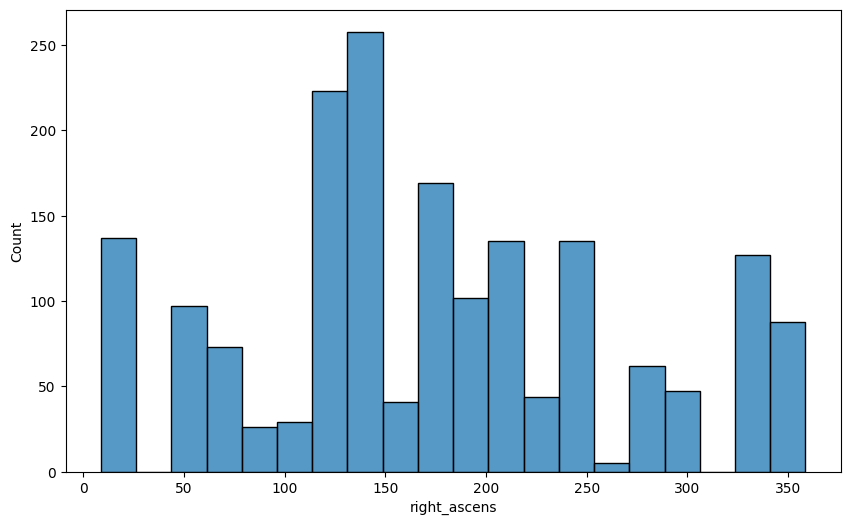

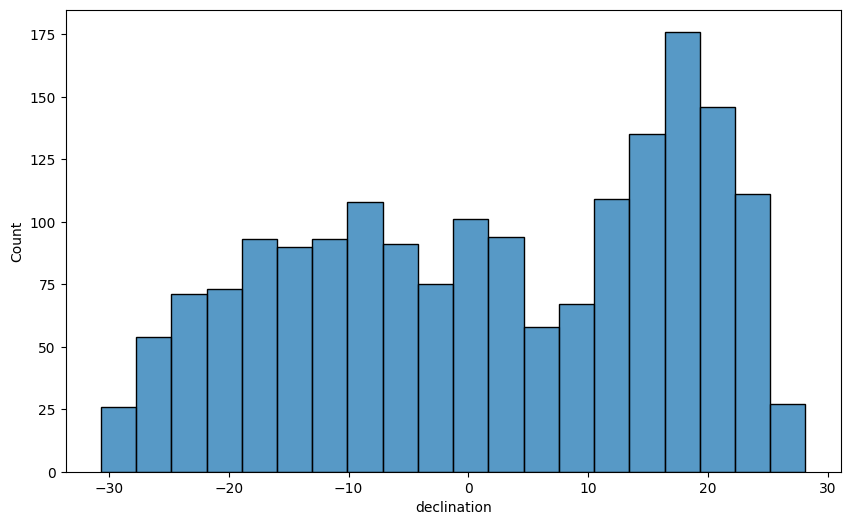

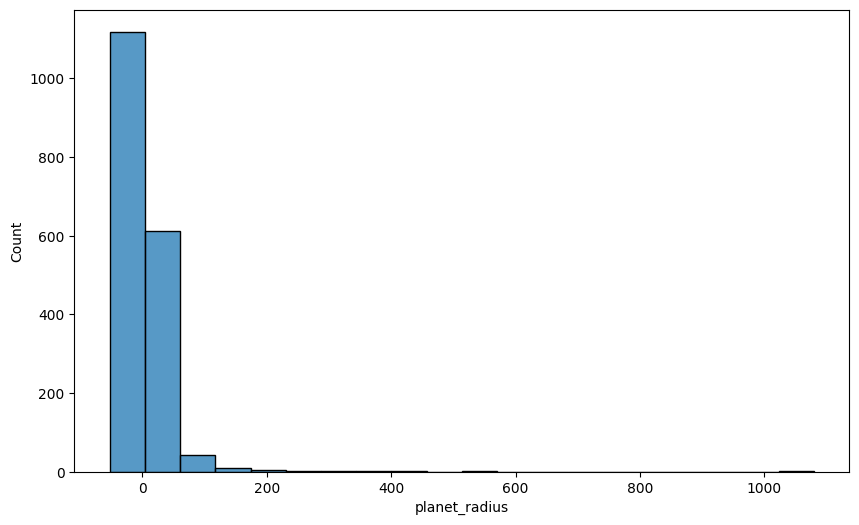

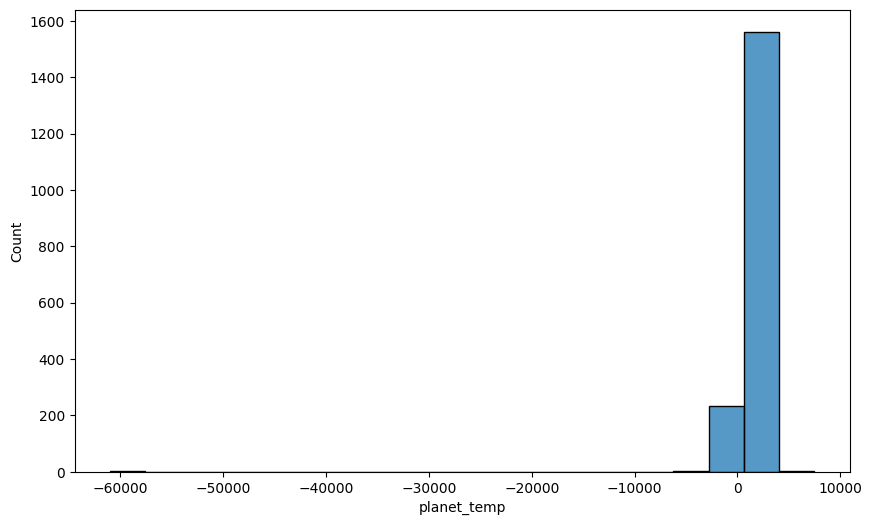

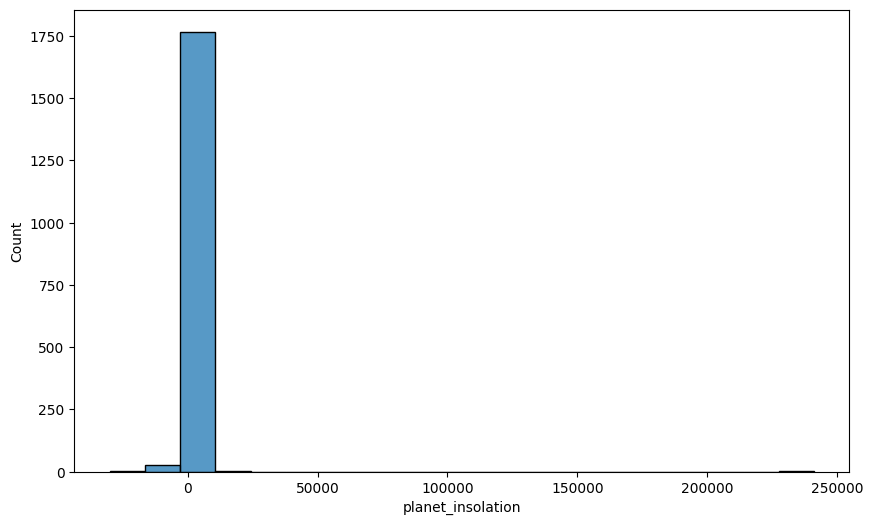

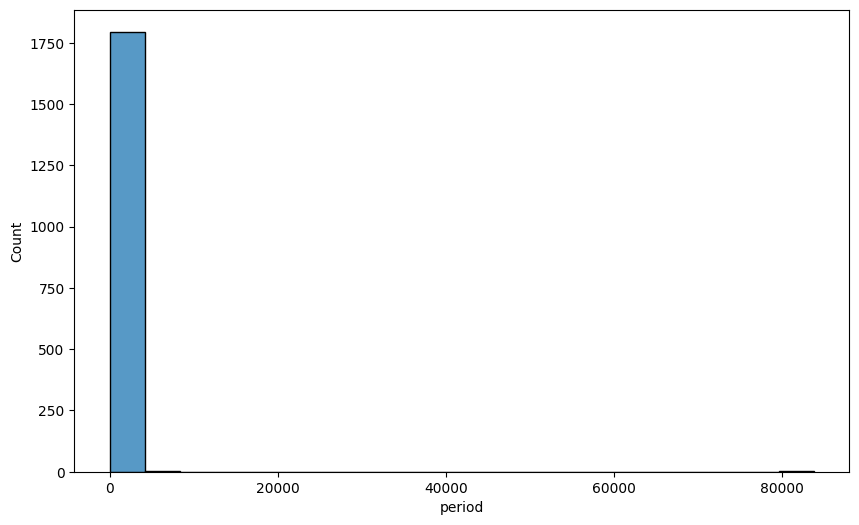

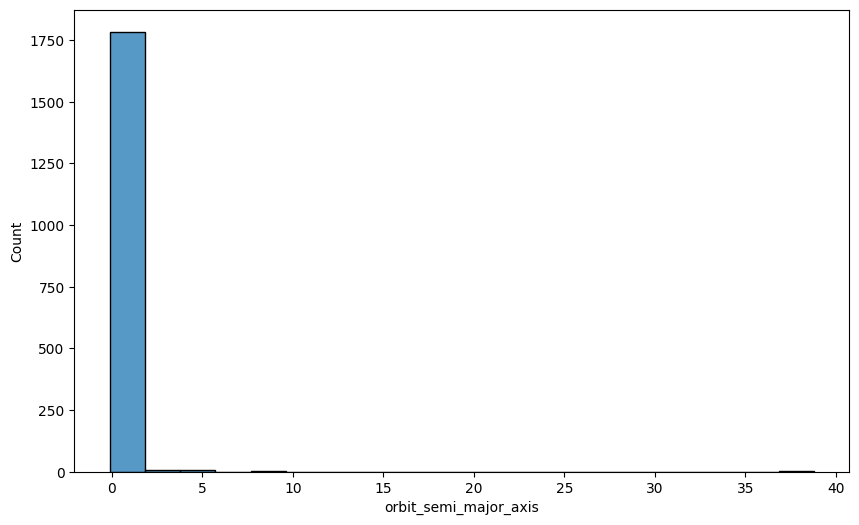

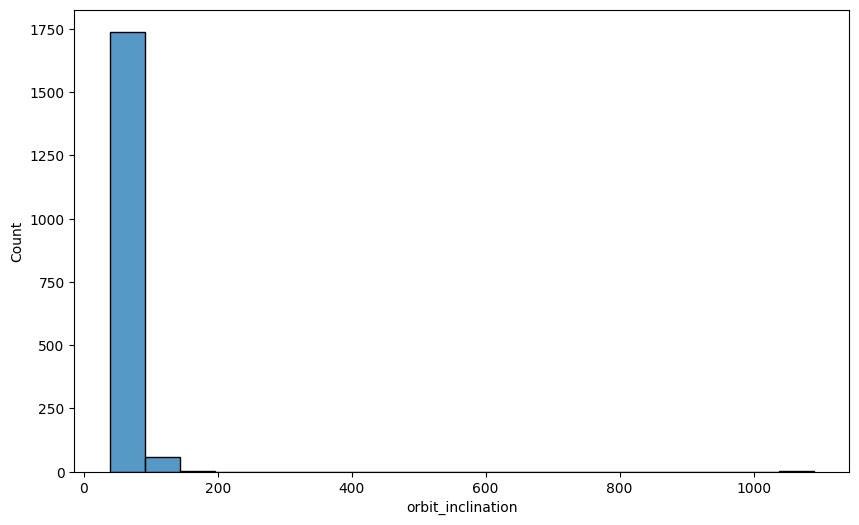

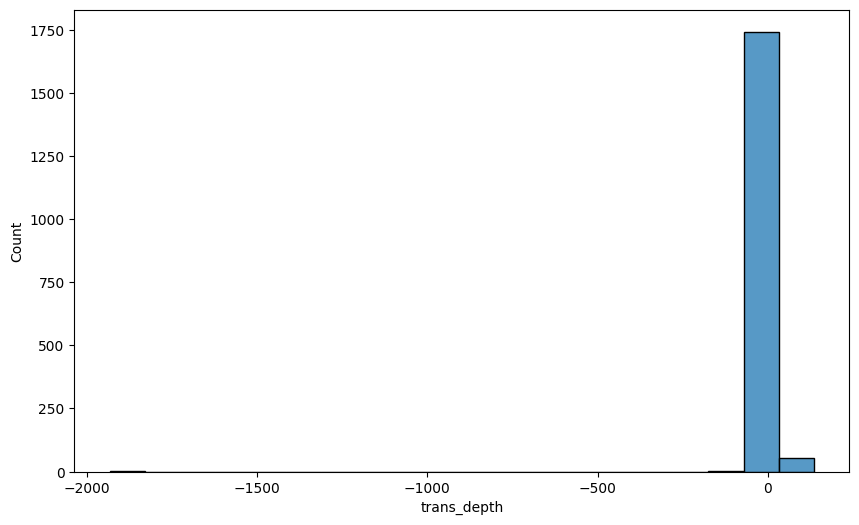

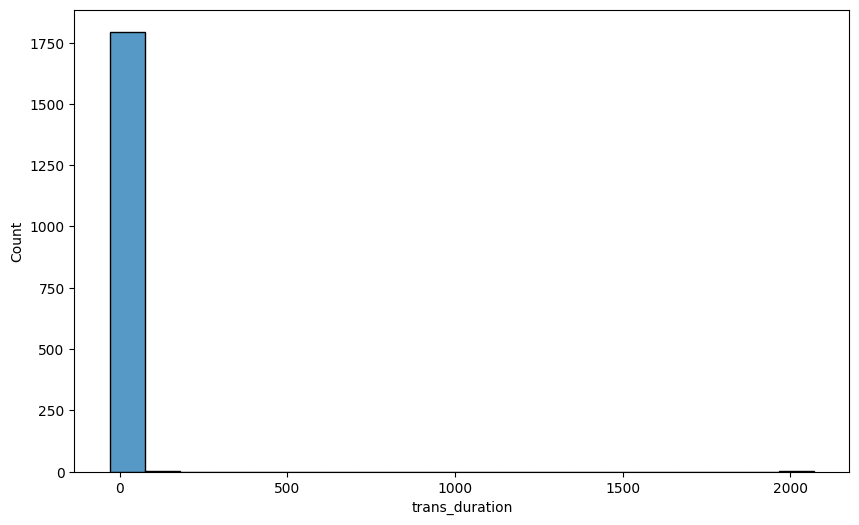

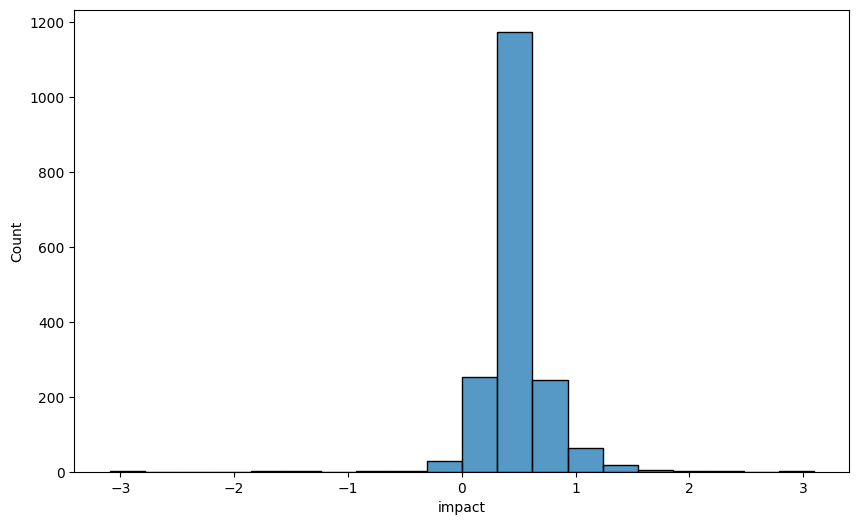

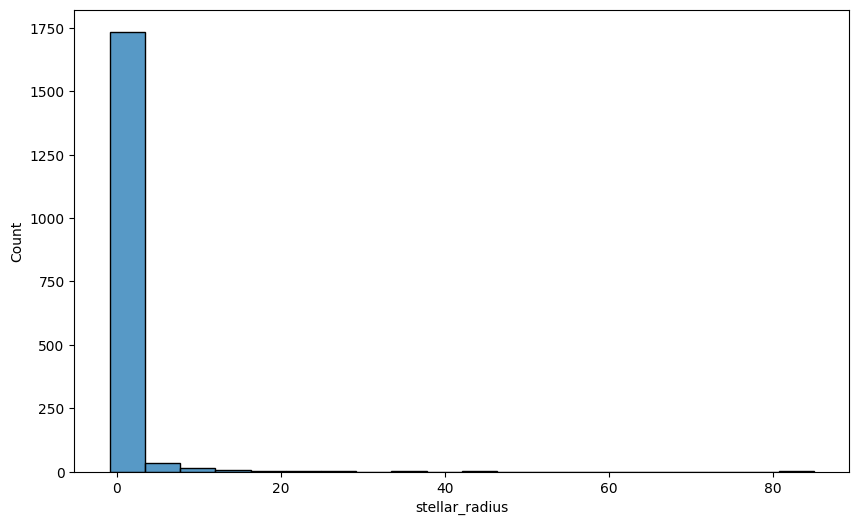

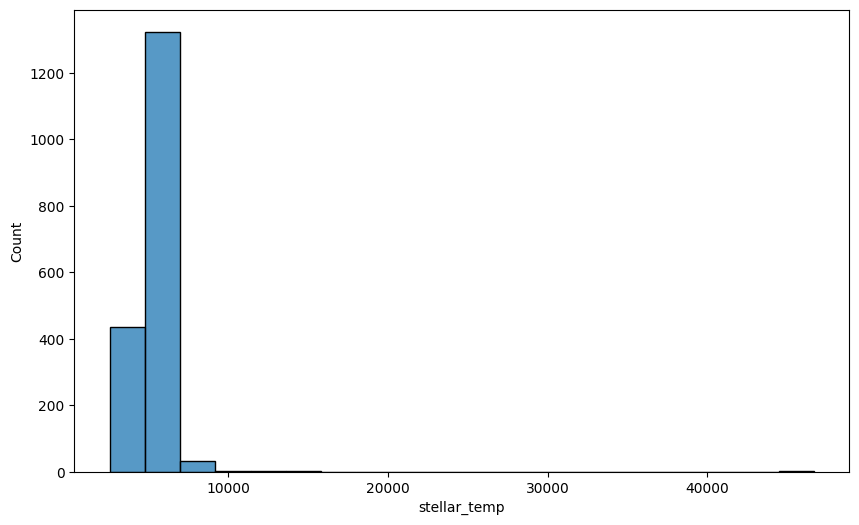

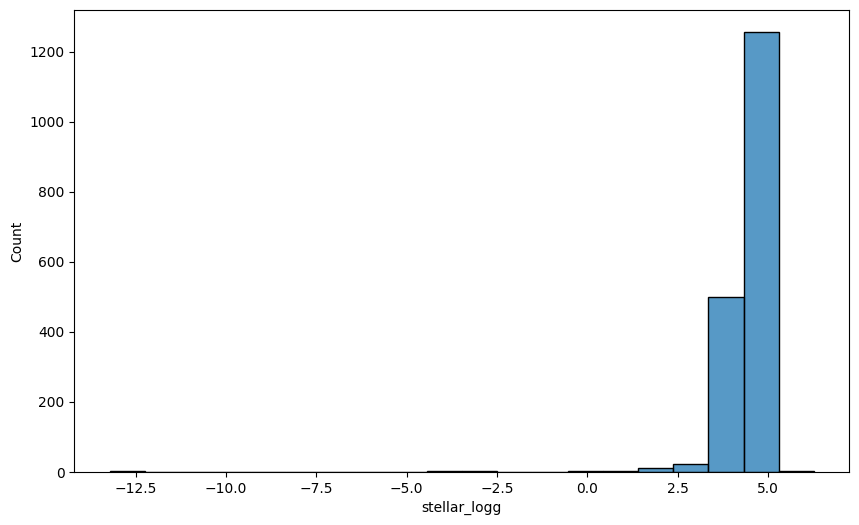

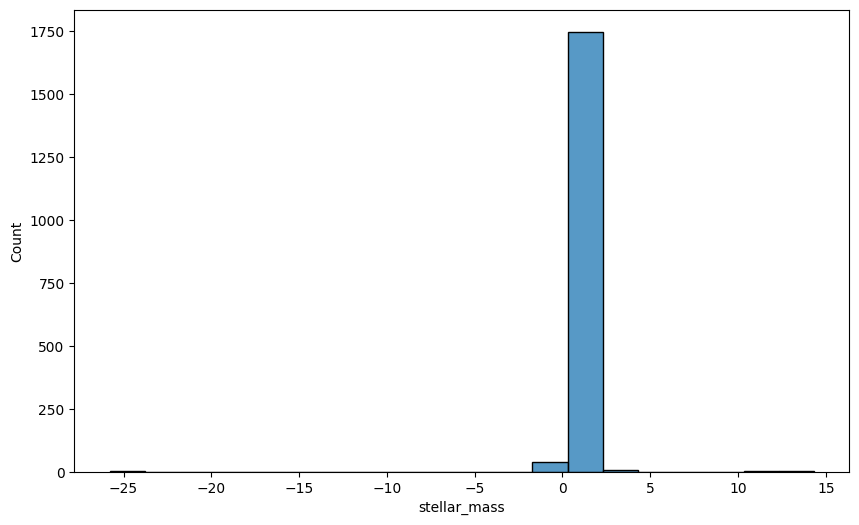

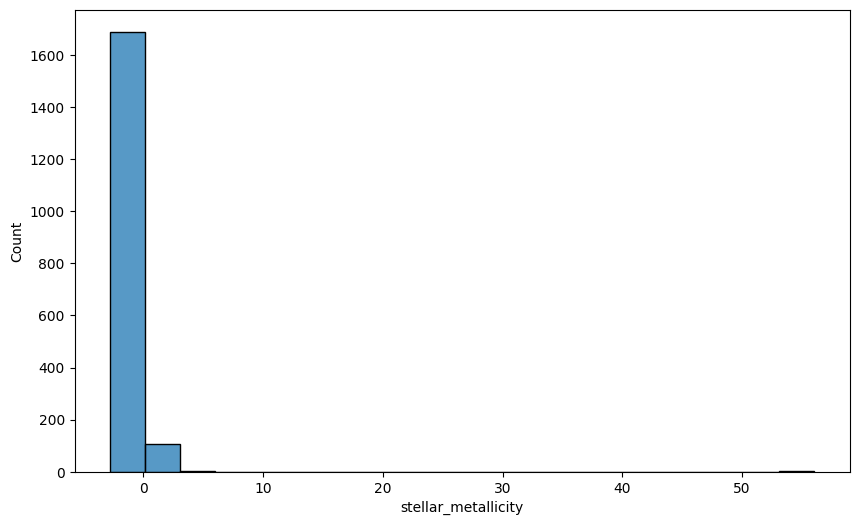

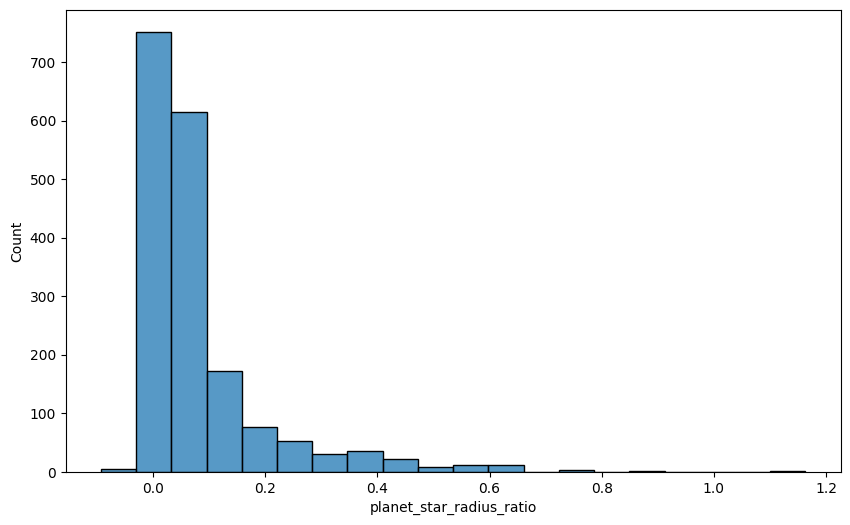

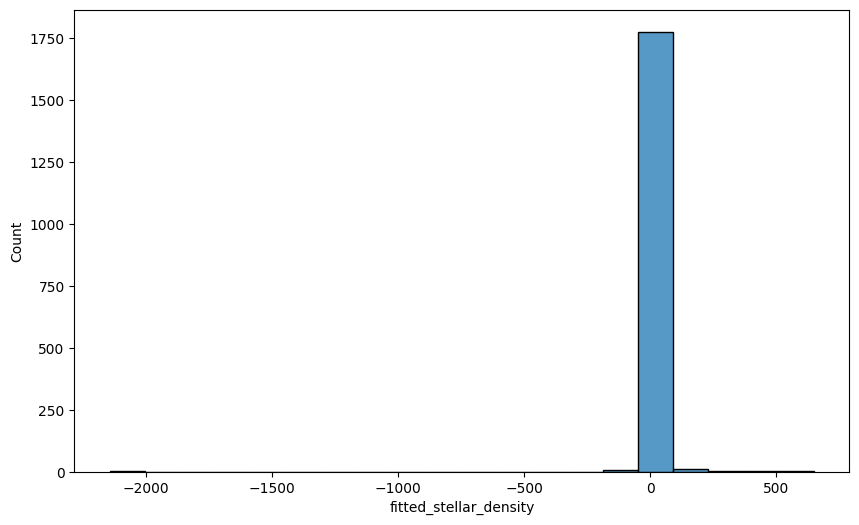

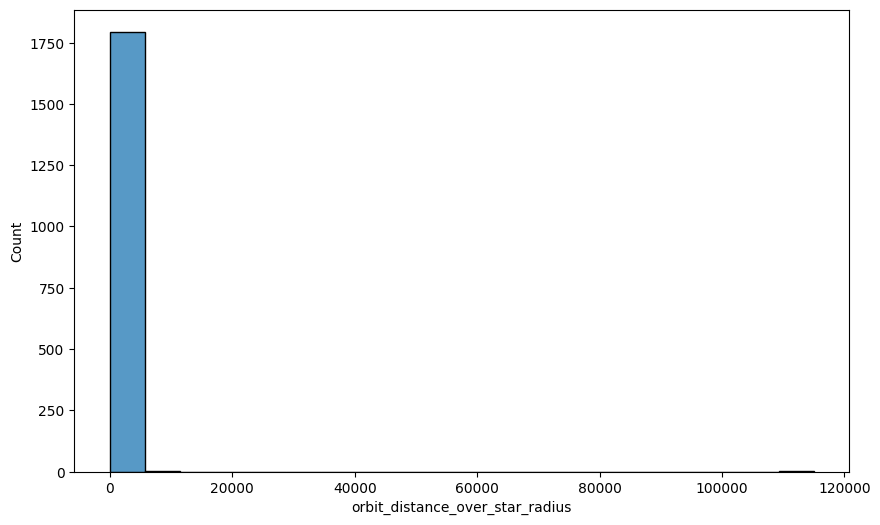

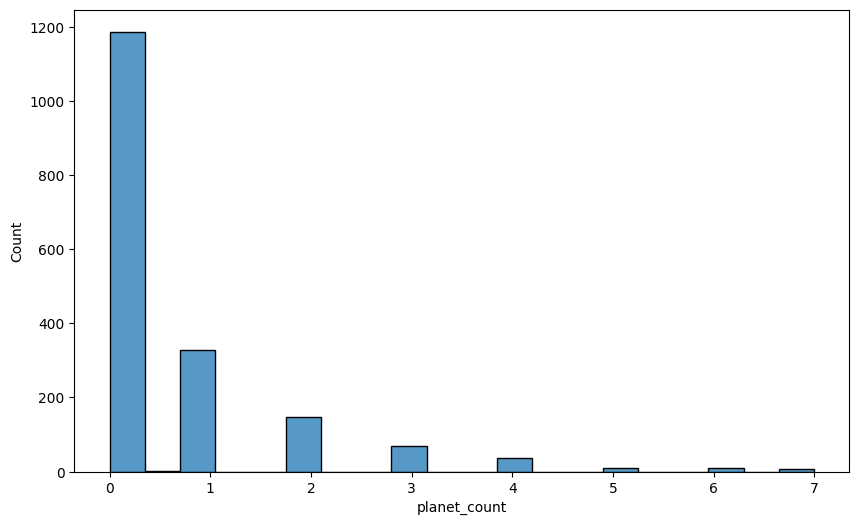

In [20]:
for col in df_filled.columns:
    plt.figure(figsize = (10, 6))
    sns.histplot(data = df_filled, x = col, bins = 20)

In [21]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1798 entries, 0 to 1805
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   is_planet                        1798 non-null   float64
 1   right_ascens                     1798 non-null   float64
 2   declination                      1798 non-null   float64
 3   planet_radius                    1798 non-null   float64
 4   planet_temp                      1798 non-null   float64
 5   planet_insolation                1798 non-null   float64
 6   period                           1798 non-null   float64
 7   orbit_semi_major_axis            1798 non-null   float64
 8   orbit_inclination                1798 non-null   float64
 9   trans_depth                      1798 non-null   float64
 10  trans_duration                   1798 non-null   float64
 11  impact                           1798 non-null   float64
 12  stellar_radius           

In [22]:
df_filled['planet_count'] = df_filled['planet_count'].astype(int)

C:\Users\nekit\AppData\Local\Temp\ipykernel_25168\419650219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled['planet_count'] = df_filled['planet_count'].astype(int)


In [23]:
df_filled.to_csv('k2_imputed_iter.csv', index = False)